(a)

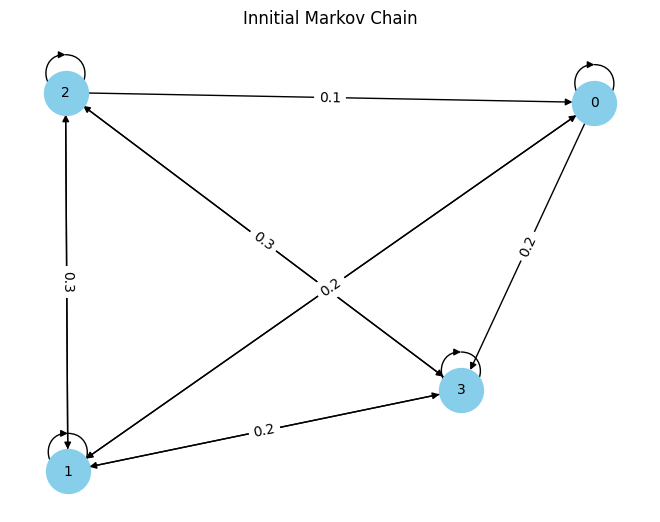

P^20:
[[0.17073182 0.33604338 0.18157173 0.31165307]
 [0.17073177 0.33604337 0.18157177 0.31165309]
 [0.17073168 0.33604336 0.18157183 0.31165313]
 [0.17073159 0.33604334 0.1815719  0.31165317]]


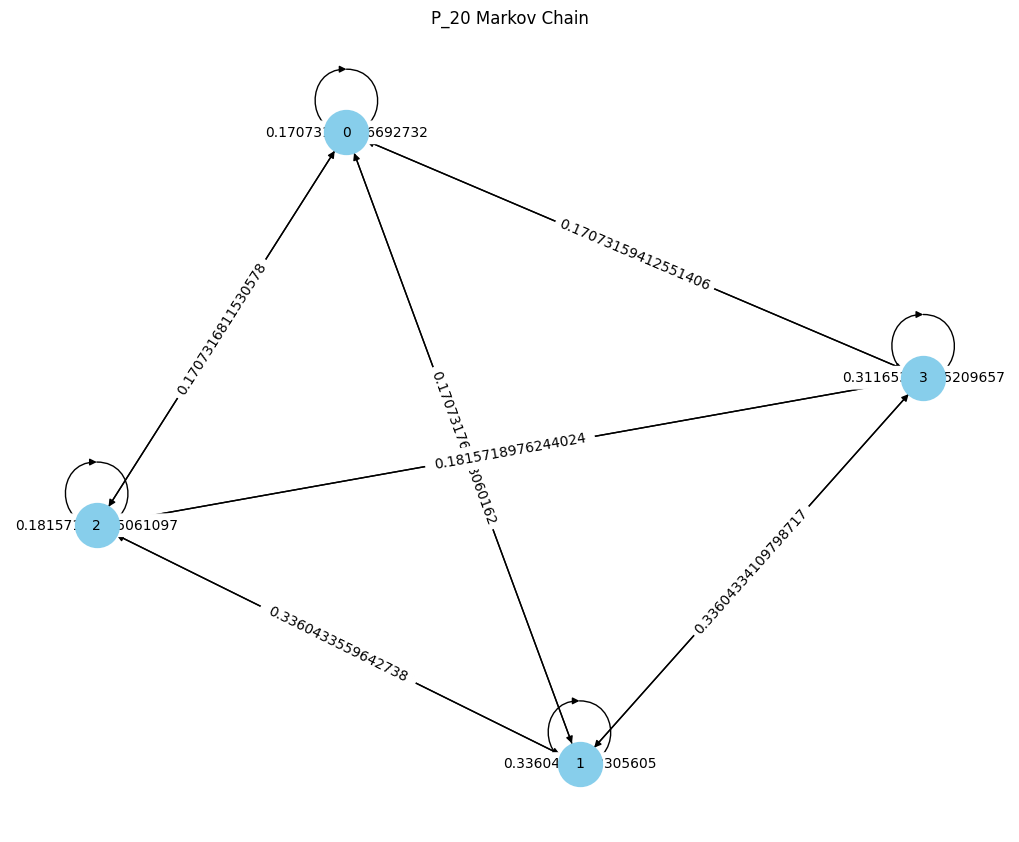


P(X20 = s | X0 = r) = 0.3117

For the precise result,
P(X20 = s | X0 = r) = 0.3116530652582661


In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the transition probability matrix P
P = np.array([[0.5, 0.3, 0, 0.2],
              [0.2, 0.5, 0.1, 0.2],
              [0.1, 0.3, 0.3, 0.3],
              [0, 0.2, 0.3, 0.5]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i in range(len(P)):
    G.add_node(i)

# Add edges with labels from the transition matrix
for i in range(len(P)):
    for j in range(len(P[i])):
        if P[i][j] != 0:
            G.add_edge(i, j, weight=P[i][j])

# Draw the graph
pos = nx.spring_layout(G)  # Define the layout of the nodes
labels = nx.get_edge_attributes(G, 'weight')  # Get edge labels
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Innitial Markov Chain")
plt.show()

# Compute P^20
P_20 = np.linalg.matrix_power(P, 20)

# Print P^20
print("P^20:")
print(P_20)

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i in range(len(P_20)):
    G.add_node(i)

# Add edges with labels from the transition matrix
for i in range(len(P_20)):
    for j in range(len(P_20[i])):
        if P_20[i][j] != 0:
            G.add_edge(i, j, weight=P_20[i][j])

# Draw the graph
plt.figure(figsize=(10, 8))  # Set width and height as needed
pos = nx.spring_layout(G)  # Define the layout of the nodes
labels = nx.get_edge_attributes(G, 'weight')  # Get edge labels
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("P_20 Markov Chain")
plt.show()

# Print P(X20 = s | X0 = r)
probability_s_given_r = P_20[0, 3]
print(f"\nP(X20 = s | X0 = r) = {probability_s_given_r:.4f}")
print()
print("For the precise result,")
print(f"P(X20 = s | X0 = r) = {probability_s_given_r}")

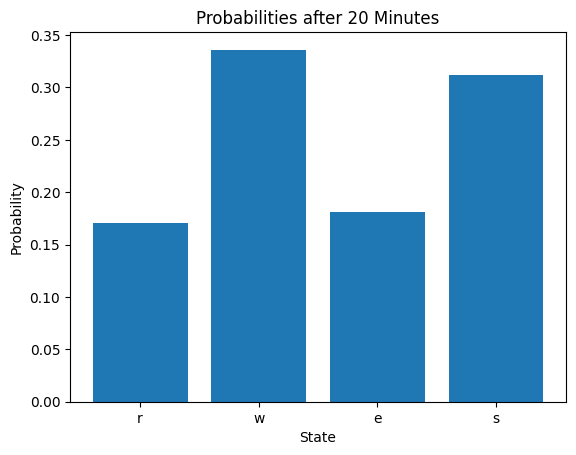

In [9]:


import matplotlib.pyplot as plt

# Define the state labels
states = ['r', 'w', 'e', 's']

# Get the probabilities after 20 minutes
probabilities = P_20[0]

# Create a bar chart
plt.bar(states, probabilities)
plt.xlabel('State')
plt.ylabel('Probability')
plt.title('Probabilities after 20 Minutes')
plt.show()


(b)

P^25:
[[0.17073171 0.33604336 0.18157181 0.31165312]
 [0.17073171 0.33604336 0.18157181 0.31165312]
 [0.17073171 0.33604336 0.18157182 0.31165312]
 [0.1707317  0.33604336 0.18157182 0.31165312]]


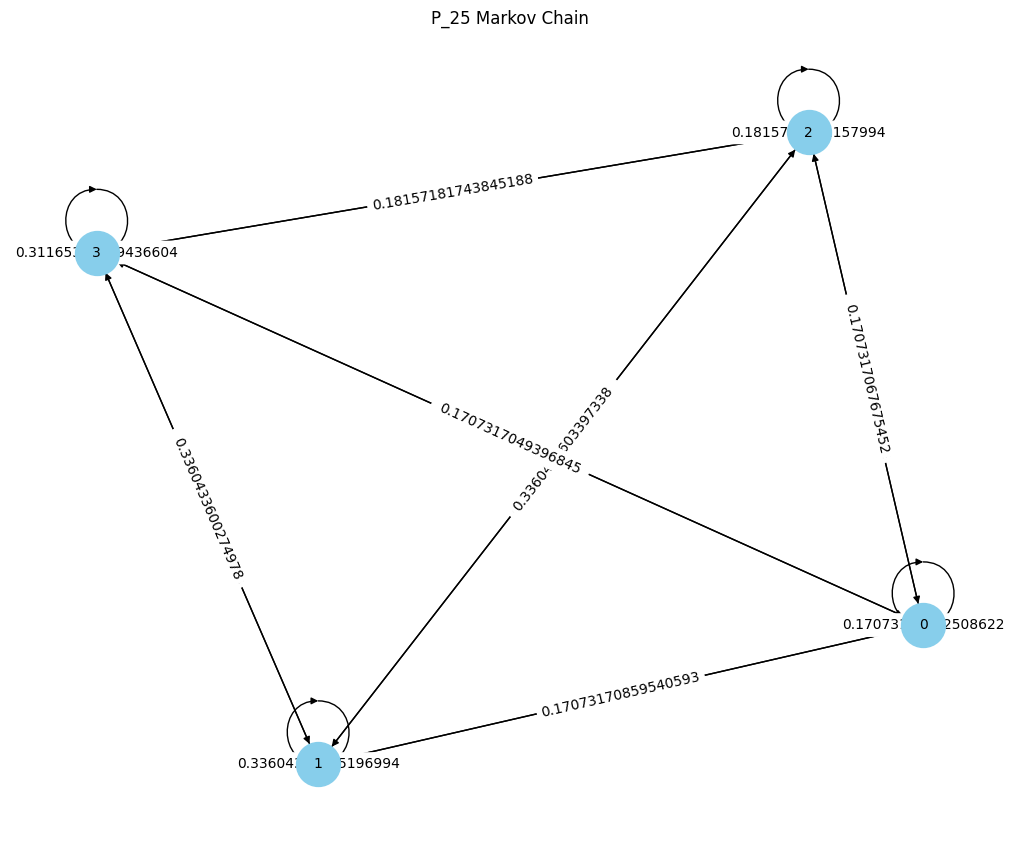


P(X25 = s | X20 = s) = 0.3117

For the precise result,
P(X25 = s | X20 = s) = 0.31165311759436604


In [23]:
# Compute P^25
P_25 = np.linalg.matrix_power(P, 25)

# Print P^25
print("P^25:")
print(P_25)

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i in range(len(P_25)):
    G.add_node(i)

# Add edges with labels from the transition matrix
for i in range(len(P_25)):
    for j in range(len(P_25[i])):
        if P_25[i][j] != 0:
            G.add_edge(i, j, weight=P_25[i][j])

# Draw the graph
plt.figure(figsize=(10, 8))  # Set width and height as needed
pos = nx.spring_layout(G)  # Define the layout of the nodes
labels = nx.get_edge_attributes(G, 'weight')  # Get edge labels
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("P_25 Markov Chain")
plt.show()

# Print P(X25 = s | X20 = s)
probability_s_given_s_20 = P_25[3, 3]
print(f"\nP(X25 = s | X20 = s) = {probability_s_given_s_20:.4f}")
print()
print("For the precise result,")
print(f"P(X25 = s | X20 = s) = {probability_s_given_s_20}")


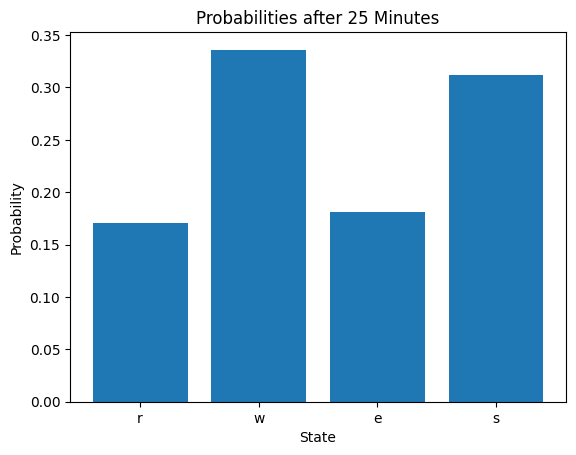

In [11]:


import matplotlib.pyplot as plt

# Define the state labels
states = ['r', 'w', 'e', 's']

# Get the probabilities after 25 minutes
probabilities = P_25[0]

# Create a bar chart
plt.bar(states, probabilities)
plt.xlabel('State')
plt.ylabel('Probability')
plt.title('Probabilities after 25 Minutes')
plt.show()


(c)

Stationary Distribution using Eigen Vector Method:
[[0.17073171]
 [0.33604336]
 [0.18157182]
 [0.31165312]]

P_n =  [[0.17073171 0.33604336 0.18157182 0.31165312]
 [0.17073171 0.33604336 0.18157182 0.31165312]
 [0.17073171 0.33604336 0.18157182 0.31165312]
 [0.17073171 0.33604336 0.18157182 0.31165312]] 

π using Repeated Matrix Multiplication =  [0.17073171 0.33604336 0.18157182 0.31165312]


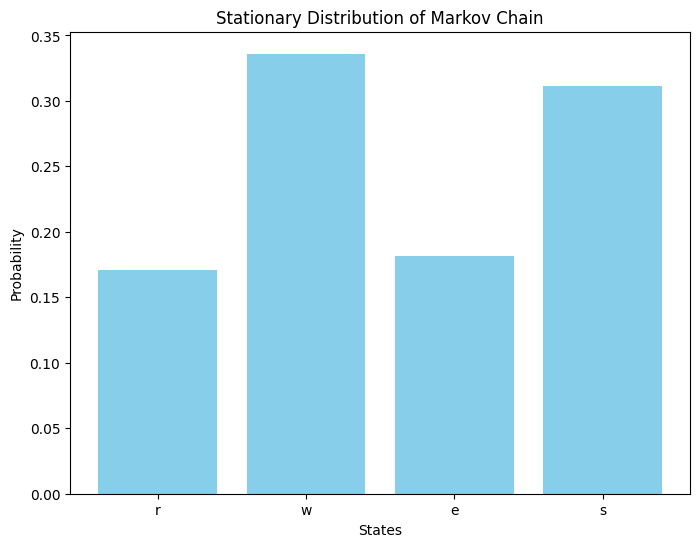

In [20]:
# Find the left eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(P.T)

# Find the index of the eigenvalue 1 (up to a small tolerance)
index_one = np.isclose(eigenvalues, 1)
eigenvector_one = eigenvectors[:, index_one]

# Normalize the eigenvector to get the stationary distribution
stationary_distribution = eigenvector_one / eigenvector_one.sum()

# Print the stationary distribution
print("Stationary Distribution using Eigen Vector Method:")
print(stationary_distribution.real)

# Here's the similar code as above using Repeated Matrix Multiplication:

steps = 10**3
P_n = P

i=0
while i<steps:
    P_n =  np.matmul(P_n, P)
    i+=1

print()
print("P_n = ", P_n, "\n")
print("π using Repeated Matrix Multiplication = ", P_n[0])

'''
# # Define the transition matrix P
# P = [
#     [0.5, 0.3, 0.0, 0.2],
#     [0.2, 0.5, 0.1, 0.2],
#     [0.1, 0.3, 0.3, 0.3],
#     [0.0, 0.2, 0.3, 0.5]
# ]

# # Number of states
# n = len(P)

# # Initialize the system of equations
# equations = []

# for i in range(n):
#     equation = [P[j][i] - (i == j) for j in range(n)] + [0]
#     equation[i] = -1
#     equations.append(equation)

# # Add the normalization equation
# equations.append([1] * n + [0])

# # Solve the system of equations
# solutions = np.linalg.lstsq(np.array(equations)[:, :-1], np.array(equations)[:, -1], rcond=None)[0]

# # Normalize the solution
# stationary_distribution = solutions / sum(solutions)

# print("Stationary Distribution:")
# print(stationary_distribution)

# # Define the transition matrix P
# P = [
#     [0.5, 0.3, 0.0, 0.2],
#     [0.2, 0.5, 0.1, 0.2],
#     [0.1, 0.3, 0.3, 0.3],
#     [0.0, 0.2, 0.3, 0.5]
# ]

# # Number of states
# n = len(P)

# # Initialize the system of equations
# equations = []

# for i in range(n):
#     equation = [P[j][i] - (i == j) for j in range(n)] + [0]
#     equation[i] = -1
#     equations.append(equation)

# # Add the normalization equation
# equations.append([1] * n + [-1])

# # Solve the system of equations
# solutions = np.linalg.solve(np.array(equations)[:, :-1], np.array(equations)[:, -1])

# # Normalize the solution
# stationary_distribution = solutions / sum(solutions)

# print("Stationary Distribution:")
# print(stationary_distribution)


# A = np.array([[0.2, 0.6, 0.2], [0.3, 0.0, 0.7], [0.5, 0.0, 0.5]])

# # Find the left eigenvectors and eigenvalues
# eigenvalues, eigenvectors = np.linalg.eig(A.T)

# # Find the index of the eigenvalue 1 (up to a small tolerance)
# index_one = np.isclose(eigenvalues, 1)
# eigenvector_one = eigenvectors[:, index_one]

# # Normalize the eigenvector to get the stationary distribution
# stationary_distribution = eigenvector_one / eigenvector_one.sum()

# # Print the stationary distribution
# print("Stationary Distribution:")
# print(stationary_distribution.real)
'''

import matplotlib.pyplot as plt

# Define the states and stationary distribution
states = ['r', 'w', 'e', 's']
stationary_distribution = [0.17073171, 0.33604336, 0.18157182, 0.31165312]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(states, stationary_distribution, color='skyblue')
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Stationary Distribution of Markov Chain')
plt.show()



(d)

In this context, the limiting distribution is the long-term behavior of the Markov chain as time approaches infinity. For a finite state, irreducible and aperiodic Markov chain, the limiting distribution exists and is equal to the stationary distribution.

Since we have already found the stationary distribution in the previous step, we can conclude that the limiting distribution exists and it is the same as the stationary distribution we computed earlier.

The stationary distribution we calculated in the previous step is also the limiting distribution for this Markov chain.

In the below mentioned code, we first define the transition matrix P. Then, we check for irreducibility by calculating the communication classes. Next, we check for aperiodicity by finding the cycle lengths and calculating their greatest common divisor (gcd).

The output will indicate whether the Markov chain is irreducible and aperiodic.

In [13]:
import numpy as np

# Define the transition matrix P
P = np.array([
    [0.5, 0.3, 0.0, 0.2],
    [0.2, 0.5, 0.1, 0.2],
    [0.1, 0.3, 0.3, 0.3],
    [0.0, 0.2, 0.3, 0.5]
])

# Irreducibility check
communication_classes = np.zeros_like(P, dtype=bool)

for i in range(len(P)):
    for j in range(len(P)):
        if np.all(np.linalg.matrix_power(P, j)[i] > 0):
            communication_classes[i] = True

if np.all(np.sum(communication_classes, axis=0) == len(P)):
    print("The Markov chain is irreducible")
else:
    print("The Markov chain is not irreducible")

# Aperiodicity check
cycle_lengths = []

for i in range(len(P)):
    if P[i, i] > 0:
        cycle_lengths.append(i + 1)

gcd_result = np.gcd.reduce(cycle_lengths)

if gcd_result == 1:
    print("The Markov chain is aperiodic")
else:
    print(f"The Markov chain is periodic with a period of {gcd_result}")


The Markov chain is irreducible
The Markov chain is aperiodic


The provided code performs two checks on a Markov chain defined by the transition matrix \(P\):

1. **Irreducibility Check**:
   - The code first initializes a boolean matrix `communication_classes` with the same dimensions as \(P\).
   - It then iterates through all states (`i` and `j`) and checks if, after \(j\) transitions, state `i` can be reached from any other state. If yes, it sets the corresponding element in `communication_classes` to `True`.
   - Finally, it checks if the sum of `True` values in each column of `communication_classes` is equal to the number of states. If true for all columns, the Markov chain is deemed irreducible.

2. **Aperiodicity Check**:
   - The code initializes an empty list `cycle_lengths` and iterates through all states.
   - For each state, it checks if there is a self-loop (transition probability greater than 0 from a state to itself). If yes, it appends the length of the cycle to `cycle_lengths`.
   - It then calculates the greatest common divisor (gcd) of the cycle lengths.
   - If the gcd is 1, it implies the Markov chain is aperiodic. Otherwise, it is periodic with the period equal to the gcd.

This implies that the Markov Chain has the same Limiting Distribution as the Stationary Distribution.

Still, for the sake of completeness, I've added the relevant Python code to compute Limiting Distribution below - for reference.

Limiting Distribution: [0.17073171 0.33604336 0.18157182 0.31165312]


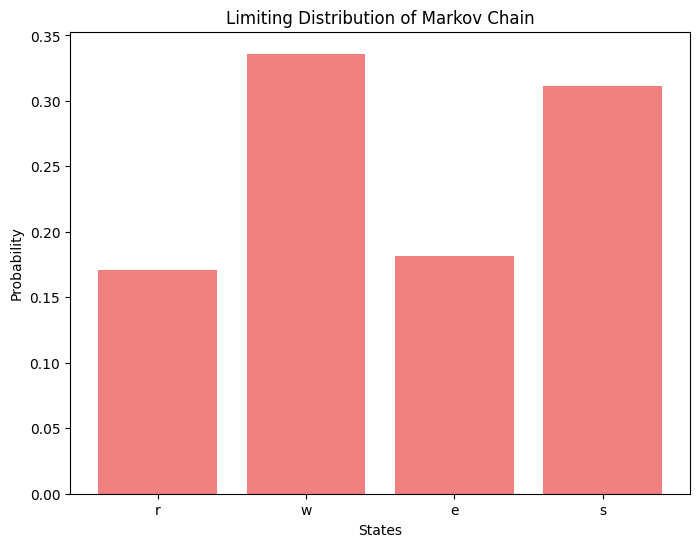

In [21]:
# Initialize an arbitrary initial probability vector
v0 = np.array([0.25, 0.25, 0.25, 0.25])

# Define a small threshold for convergence
threshold = 1e-10

# Perform Power Iteration Method for Computing the Limiting Distribution
v = v0
while True:
    v_new = np.dot(v, P)
    if np.linalg.norm(v_new - v) < threshold:
        break
    v = v_new

# The final v is the limiting distribution
limiting_distribution = v

print("Limiting Distribution:", limiting_distribution)

import matplotlib.pyplot as plt

# Define the states and limiting distribution
states = ['r', 'w', 'e', 's']
limiting_distribution = [0.17073264, 0.33604352, 0.18157114, 0.3116527]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(states, limiting_distribution, color='lightcoral')
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Limiting Distribution of Markov Chain')
plt.show()


In this code, we start with an arbitrary initial probability vector v0. We then perform the power iteration by multiplying the vector by the transition matrix P iteratively until the difference between consecutive vectors falls below a small threshold (threshold). The final vector v is the limiting distribution.

Note that the accuracy of this method can be increased substantially, by:

1) Altering the threshold, by making it even more smaller.